In [14]:
#import packages and CH4 files

import pandas as pd
import numpy as np
import os
import openpyxl


#DF CH4 Import

if os.name == 'nt':
    df_file = "E:/GitHub/BICC/Paleochrono/BICC2025/raw data/Methane Data/DF CH4.xlsx"
elif os.name == 'posix':
    x

df_ch4 = pd.read_excel(df_file, comment="#", skiprows=19, sheet_name=5, usecols=[0,1], names=["depth (m)", "CH4 (ppb)"])

df_ch4.dropna(inplace=True)

#EDC CH4 Import

if os.name == 'nt':
    edc_file = "E:/GitHub/BICC/Paleochrono/BICC2025/raw data/Methane Data/EDC CH4.xlsx"
elif os.name == 'posix':
    x

edc_ch4 = pd.read_excel(edc_file, comment="#", skiprows=9, sheet_name=0, usecols=[0,1,2], names=["Gas age (a bp)", "CH4 (ppb)", "uncertainty"])

edc_ch4.dropna(inplace=True)

#EDML CH4 Import

if os.name == 'nt':
    edml_file = "E:/GitHub/BICC/Paleochrono/BICC2025/raw data/Methane Data/EDML CH4.tab"
elif os.name == 'posix':
    x

edml_ch4 = pd.read_csv(edml_file, delimiter="\t", comment="#", names=["depth (m)", "Gas age (a bp)", "CH4 (ppb)"])

edml_ch4.dropna(inplace=True)

edml_ch4["Gas age (a bp)"] = edml_ch4["Gas age (a bp)"]*1000

#WDC CH4 Import

if os.name == 'nt':
    wdc_file = "E:/GitHub/BICC/Paleochrono/BICC2025/raw data/Methane Data/WDC CH4.txt"
elif os.name == 'posix':
    x

wdc_ch4 = pd.read_csv(wdc_file, delimiter="\t", comment="#", names=["depth (m)", "Gas age (a bp)", "CH4 (ppb)", "lab"])

wdc_ch4.dropna(inplace=True)

wdc_ch4 = pd.DataFrame({
    "depth": wdc_ch4["depth (m)"],
    "Gas age (a bp)": wdc_ch4["Gas age (a bp)"],
    "CH4 (ppb)": wdc_ch4["CH4 (ppb)"]

})

In [15]:
#import core output files

paleo_output = {}

for core in cores:
    if os.name == 'nt':
        core_df_path = f"E:/GitHub/BICC/Paleochrono/BICC2025/{core}/output.txt"
    elif os.name == 'posix':
        x
    core_df = pd.read_csv(core_df_path, delimiter="\t", comment="#", names=["depth", "ice_age", "sigma_ice_age", "air_age", "sigma_air_age", "sigma_delta_age", "deporate", "sigma_deporate", "thinning", "sigma_thinning", "LID", "sigma_LID", "delta_depth", "sigma_delta_depth", "deporate_model", "sigma_deporate_model", "thinning_model", "sigma_thinning_model", "LID_model", "sigma_LID_model", "icelayerthick", "sigma_icelayerthick", "airlayerthick", "sigma_airlayerthick"])
    
    core_df = pd.DataFrame({
    "depth": core_df["depth"],
    "air_age": core_df["air_age"],
    })

    core_df.dropna(inplace=True)
    
    paleo_output[core] = core_df


In [16]:
ch4_df = {}

#this is temp fix because DF doesn't have gas age
cores = ['EDC', 'EDML', 'WDC']
core_ch4 = [edc_ch4, edml_ch4, wdc_ch4]

for core, core_data in zip(cores, core_ch4):
    paleo_depth_age = pd.DataFrame({
        "depth": paleo_output[core]['depth'],
        "air_age": paleo_output[core]['air_age']
    })

    lab_ch4 = pd.DataFrame({
        "gas_age (a bp)": core_data["Gas age (a bp)"],
        "ch4_ppb": core_data["CH4 (ppb)"]
    })

    interpolated_depth = np.interp(lab_ch4["gas_age (a bp)"], paleo_depth_age["air_age"], paleo_depth_age["depth"])

    ch4_df[core] = pd.DataFrame({
        "depth (m)": interpolated_depth,
        "gas_age (a bp)": lab_ch4["gas_age (a bp)"],
        "ch4_ppb": lab_ch4["ch4_ppb"]
    })


In [17]:
#bringing in GML data
#LongRun Methane Conc. from GML

if os.name == 'nt':
    GML_path = "E:/GitHub/BICC/Paleochrono/BICC2025/raw data/Methane Data/CH4_GML_Data.xlsx"
elif os.name == 'posix':
    x
GML_CH4 = pd.read_excel(GML_path, skiprows=0, usecols=[2,3], names=["years ago", "CH4 (ppb)"])

GML_CH4.dropna(inplace=True)

GML_CH4["years ago"] = GML_CH4["years ago"]*-1
GML_CH4["years ago"] = GML_CH4["years ago"]+1950 #align to 1950 as 0

print(GML_CH4)


      years ago  CH4 (ppb)
0        799396   399.3000
1        798417   457.8000
2        797277   396.1000
3        796320   418.0000
4        794938   428.3000
...         ...        ...
2138        -69  1866.6635
2139        -70  1878.8809
2140        -71  1894.9332
2141        -72  1911.0609
2142        -73  1921.8584

[2143 rows x 2 columns]


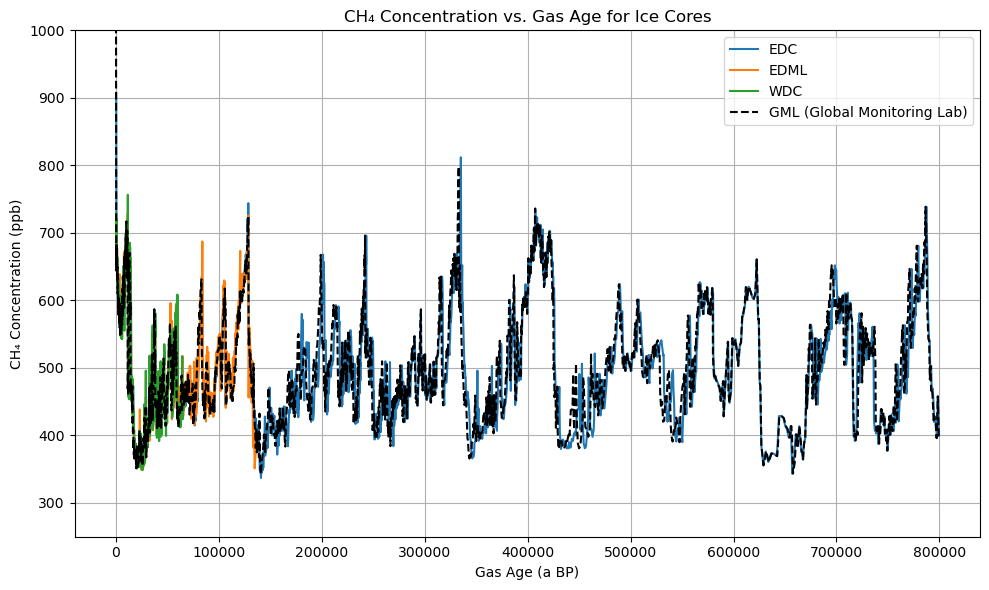

In [18]:
import matplotlib.pyplot as plt

# Create a plot
plt.figure(figsize=(10, 6))

# Plot data for each core
for core in ch4_df:
    plt.plot(
        ch4_df[core]["gas_age (a bp)"], 
        ch4_df[core]["ch4_ppb"], 
        label=core
    )

# Plot GML data
plt.plot(
    GML_CH4["years ago"], 
    GML_CH4["CH4 (ppb)"], 
    label="GML (Global Monitoring Lab)",
    color="black",
    linestyle="--"
)

# Add labels and title
plt.xlabel("Gas Age (a BP)")
plt.ylabel("CH₄ Concentration (ppb)")
plt.title("CH₄ Concentration vs. Gas Age for Ice Cores")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.ylim(250, 1000)

# Show the plot
plt.savefig("E:/GitHub/BICC/Paleochrono/BICC2025/CH4_concentration_vs_gas_age.png")
plt.show()